# pycocotools 을 이용한 COCO dataset 살펴보기

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
print(IN_COLAB)

True


In [ ]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import os
    os.chdir('/content/drive/MyDrive/ColabNotebooks/2022_fall_bigdata/')

Mounted at /content/drive


In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

* Annotation  
2017 Train/Val annotations [241MB] http://images.cocodataset.org/annotations/annotations_trainval2017.zip
* Images
2017 Val images [5K/1GB] http://images.cocodataset.org/zips/val2017.zip

In [ ]:
dataDir='./data/annotations_trainval2017'
loc = '{}/annotations/'.format(dataDir)

In [ ]:
loc

'./data/annotations_trainval2017/annotations/'

In [ ]:
!ls $loc

captions_val2017.json		person_keypoints_val2017.json
instances_val2017.json		person_keypoints_val2017_small2.json
person_keypoints_val2017_.json	person_keypoints_val2017_small.json


## Annotation - instances

In [ ]:
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [ ]:
annFile

'./data/annotations_trainval2017/annotations/instances_val2017.json'

In [ ]:
#!head $annFile

In [ ]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.54s)
creating index...
index created!


In [ ]:
coco

In [ ]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())

In [ ]:
len(cats)

80

In [ ]:
#cats

In [ ]:
cats[3]

{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}

In [ ]:
cats[3]['supercategory']

'vehicle'

In [ ]:
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush



In [ ]:
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO supercategories: 
animal person furniture indoor accessory electronic vehicle sports kitchen food appliance outdoor


### Get img ids that satisfy given filter conditions.

In [ ]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);

In [ ]:
catIds

[1, 18, 41]

In [ ]:
imgIds = coco.getImgIds(catIds=catIds )
print(imgIds)

[549220, 324158, 279278]


In [ ]:
imgIds = coco.getImgIds(imgIds = [imgIds[1]])
print(imgIds)

[324158]


In [ ]:
#imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img = coco.loadImgs(imgIds)[0]

In [ ]:
img

{'license': 1,
 'file_name': '000000324158.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg',
 'height': 334,
 'width': 500,
 'date_captured': '2013-11-19 23:54:06',
 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg',
 'id': 324158}

In [ ]:
img['id']

324158

In [ ]:
img['file_name']

'000000324158.jpg'

In [ ]:
img['coco_url']

'http://images.cocodataset.org/val2017/000000324158.jpg'

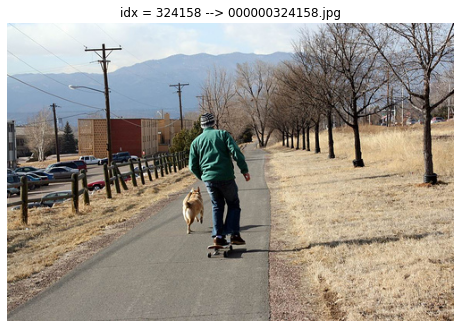

In [ ]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.title('idx = {} --> {}'.format(img['id'], img['file_name']))
plt.show()

### Get ann ids that satisfy given filter conditions.

In [ ]:
print('이미지 id가 {} 이고 catIds가 {} 인 정보를 기술하는 주석(annotation)을 기술하는 Id 찾기'.format(img['id'], catIds))

이미지 id가 324158 이고 catIds가 [1, 18, 41] 인 정보를 기술하는 주석(annotation)을 기술하는 Id 찾기


In [ ]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)

In [ ]:
annIds

[10673, 638724, 2162813]

왜 3개가 나왔을까? 위의 id가 어떤 것을 annotation 하고 있는지 살펴보자

In [ ]:
anns = coco.loadAnns(annIds)

In [ ]:
len(anns)

3

In [ ]:
anns[0]

{'segmentation': [[216.7,
   211.89,
   216.16,
   217.81,
   215.89,
   220.77,
   215.89,
   223.73,
   217.77,
   225.35,
   219.12,
   224.54,
   219.12,
   220.5,
   219.66,
   217.27,
   219.93,
   212.7,
   220.46,
   207.85,
   219.66,
   203.01,
   218.85,
   198.43,
   217.77,
   195.74,
   216.7,
   194.93,
   215.62,
   190.62,
   215.62,
   186.59,
   214.27,
   183.89,
   211.85,
   184.16,
   211.85,
   187.66,
   210.24,
   187.66,
   209.16,
   184.97,
   207.81,
   183.36,
   205.12,
   186.59,
   205.12,
   189.28,
   201.08,
   192.78,
   199.74,
   195.2,
   196.78,
   200.04,
   196.51,
   203.01,
   198.12,
   205.43,
   197.32,
   209.2,
   196.78,
   213.23,
   197.05,
   218.89,
   199.74,
   221.85,
   201.62,
   225.35,
   201.62,
   233.69,
   201.08,
   236.11,
   202.97,
   236.38,
   204.85,
   236.11,
   204.58,
   232.34,
   203.78,
   228.85,
   205.39,
   233.15,
   207.81,
   235.57,
   208.62,
   234.23,
   206.74,
   231.27,
   205.12,
   228.04,


다음 처럼 접근 
```
anns[0]['segmentation']
```

In [ ]:
seg = anns[2]['segmentation'] #2 for person

In [ ]:
np.shape(seg)

(1, 52)

In [ ]:
seg_x = seg[0][::2] #x
seg_y = seg[0][1::2] #y

(199.121, 278.079, 88.893, 257.347)

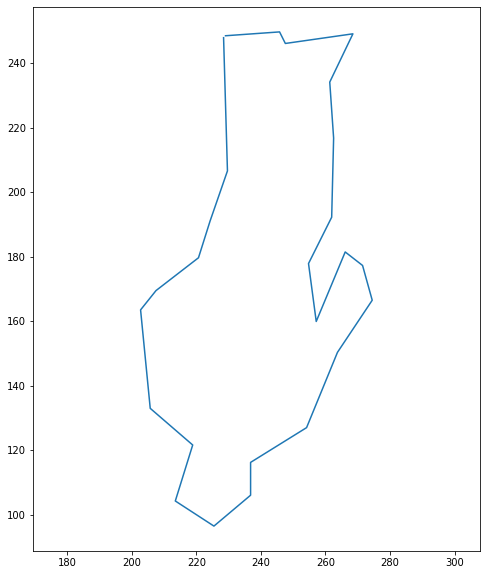

In [ ]:
plt.plot(seg_x, seg_y)
plt.axis('equal')

## Annotations - Keypoints

In [ ]:
dataDir, dataType

('./data/annotations_trainval2017', 'val2017')

In [ ]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
print(annFile)

./data/annotations_trainval2017/annotations/person_keypoints_val2017.json


In [ ]:
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=1.49s)
creating index...
index created!


In [ ]:
img['id']

324158

In [ ]:
catIds

[1, 18, 41]

In [ ]:
annIds = coco_kps.getAnnIds(imgIds=img['id'], iscrowd=None)
print(annIds)

[2162813]


In [ ]:
anns = coco_kps.loadAnns(annIds)

In [ ]:
anns

[{'segmentation': [[228.43,
    247.9,
    229.63,
    206.62,
    224.24,
    191.07,
    220.65,
    179.7,
    207.49,
    169.53,
    202.71,
    163.55,
    205.7,
    133.04,
    218.86,
    121.68,
    213.47,
    104.33,
    225.44,
    96.55,
    236.8,
    106.12,
    236.8,
    116.29,
    254.15,
    127.06,
    263.72,
    150.39,
    274.49,
    166.54,
    271.5,
    177.31,
    266.12,
    181.5,
    257.14,
    159.96,
    254.75,
    177.91,
    261.93,
    192.27,
    262.53,
    216.79,
    261.33,
    234.14,
    268.51,
    249.1,
    247.57,
    246.11,
    245.78,
    249.69,
    229.03,
    248.5]],
  'num_keypoints': 12,
  'area': 5999.5445,
  'iscrowd': 0,
  'keypoints': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   212,
   135,
   2,
   241,
   125,
   2,
   209,
   162,
   2,
   257,
   146,
   2,
   218,
   172,
   2,
   267,
   167,
   2,
   225,
   177,
   2,
   247,
   176,
   2,
   235,
   203,
   2,
   254,

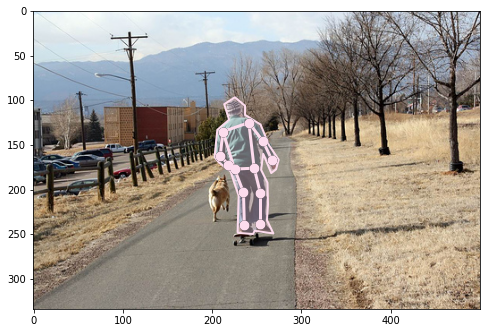

In [ ]:
plt.imshow(I)
coco_kps.showAnns(anns)

In [ ]:
seg_kf = anns[0]['segmentation']

(199.121, 278.079, 88.893, 257.347)

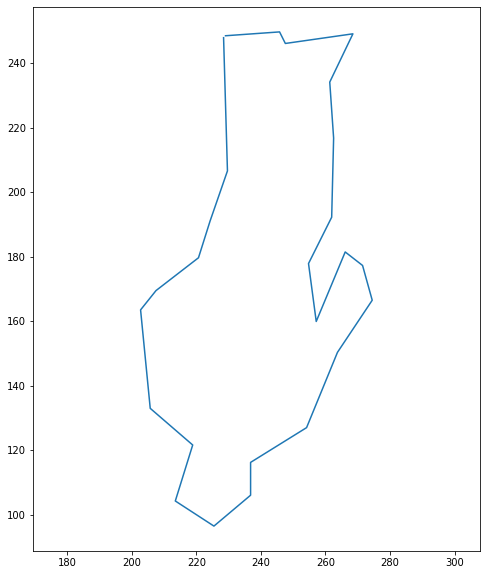

In [ ]:
seg_kf_x = seg_kf[0][::2]
seg_kf_y = seg_kf[0][1::2]

plt.plot(seg_kf_x, seg_kf_y)
#plt.plot(seg_x, seg_y, '.')
plt.axis('equal')

In [ ]:
kpts = anns[0]['keypoints']

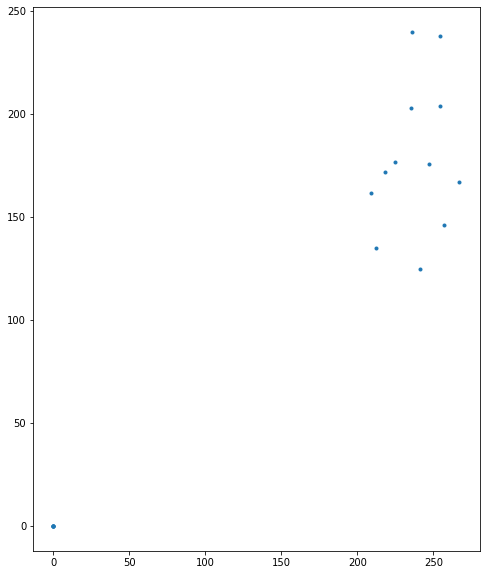

In [ ]:
kpts_x = kpts[::3] # 0, 3, 6, ...
kpts_y = kpts[1::3] # 1, 4, 7, ...

plt.plot(kpts_x, kpts_y, '.')

## Annotations - captions

In [ ]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
print(annFile)

./data/annotations_trainval2017/annotations/captions_val2017.json


In [ ]:
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


In [ ]:
annIds = coco_caps.getAnnIds(imgIds=img['id'])

In [ ]:
anns = coco_caps.loadAnns(annIds)

In [ ]:
anns

[{'image_id': 324158,
  'id': 310079,
  'caption': 'A man is skate boarding down a path and a dog is running by his side.'},
 {'image_id': 324158,
  'id': 311105,
  'caption': 'A man on a skateboard with a dog outside. '},
 {'image_id': 324158,
  'id': 311588,
  'caption': 'A person riding a skate board with a dog following beside.'},
 {'image_id': 324158,
  'id': 312677,
  'caption': 'This man is riding a skateboard behind a dog.'},
 {'image_id': 324158,
  'id': 312860,
  'caption': 'A man walking his dog on a quiet country road.'}]

* References
    * https://cocodataset.org/#download
    * https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb